In [1]:
import sys
import os
import xarray as xr
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [6]:
xr.__version__

'0.16.0'

In [7]:
np.__version__

'1.19.1'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
MERRA2_dir = '/data2/willytsai/MERRA2/inst_2d_hourly'
os.chdir(MERRA2_dir)

In [4]:
files = glob('*2014*')+glob('*2015*')+glob('*2016*')+glob('*2017*')+glob('*2018*') # selecting 2014-2018
cwv_data = xr.open_mfdataset(files) # merging data files in one

In [5]:
cwv_data

,Array,Chunk
Bytes,12.22 GB,6.69 MB
Shape,"(43824, 121, 576)","(24, 121, 576)"
Count,5478 Tasks,1826 Chunks
Type,float32,numpy.ndarray


In [33]:
lon = cwv_data.lon
lat = cwv_data.lat
TQV = cwv_data.TQV

In [53]:
land_msk = xr.open_dataset(MERRA2_dir+'/../landmask_MERRA2.nc')
lsm = land_msk.sel(lat=slice(-30,30)).lsm[0,:,:] # landmask, 30N-30S
lsm 

<xarray.DataArray 'lsm' (lat: 121, lon: 576)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -30.0 -29.5 -29.0 -28.5 -28.0 ... 28.5 29.0 29.5 30.0
    time     datetime64[ns] 1989-01-01T12:00:00
Attributes:
    standard_name:  land_binary_mask
    long_name:      Land-sea mask
    units:          (0 - 1)

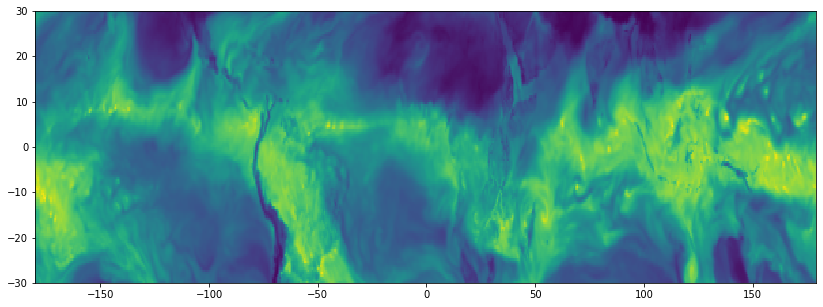

In [39]:
fig = plt.figure(figsize=(14,5))
plt.pcolor(lon,lat,TQV[0,:,:])

In [54]:
# maskout 
TQV_land = np.copy(TQV[0,:,:]) # TQV over land only
TQV_land[lsm==0] = np.nan

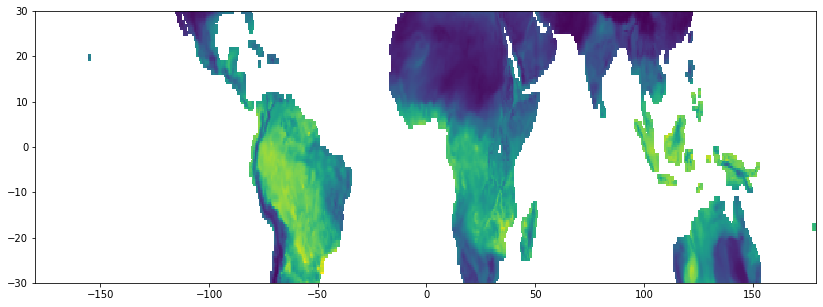

In [55]:
fig = plt.figure(figsize=(14,5))
plt.pcolor(lon,lat,TQV_land[:,:])

(121, 576)